# Pet Classification Model Using CNN.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
import os
import random
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !unzip data.zip

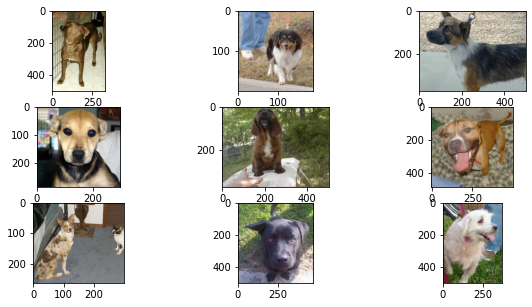

In [3]:
# show images (train dogs)
plt.figure(figsize=(10, 5))
for i in range(9):
    j= i+1
    plt.subplot(3,3,j)
    img = imread('data/train/dogs/' + str(j) + '.jpg')
    plt.imshow(img)

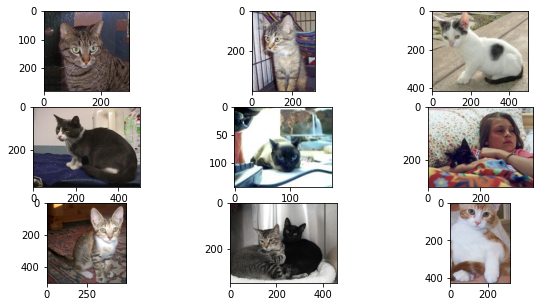

In [4]:
# show images (train cats)
plt.figure(figsize=(10, 5))
for i in range(9):
    j= i+1
    plt.subplot(3,3,j)
    img = imread('data/train/cats/' + str(j) + '.jpg')
    
    plt.imshow(img)

In [6]:
# Prepare images for modelling

datagen2 = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,
                     validation_split = 0.2,
                     horizontal_flip = True,         
                     featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90,
                     width_shift_range=0.1,
                     height_shift_range=0.1)

In [7]:
# trainset

training_set = datagen2.flow_from_directory('data/train', classes=['dogs', 'cats'])

Found 40 images belonging to 2 classes.


In [8]:
validation_set = datagen2.flow_from_directory('data/test', classes=['dogs', 'cats'])

Found 20 images belonging to 2 classes.


In [9]:
training_set.num_classes

2

In [10]:
training_set.image_shape

(256, 256, 3)

In [11]:
# list file names from cats and dogs folders in train
fn_cats = os.listdir('data/train/cats')
fn_dogs = os.listdir('data/train/dogs')

In [12]:
# categorize 0 for cats and 1 for dogs in train
categories = []

for image in fn_cats:
    category = image.split('.')[0]
    categories.append('cat')
  
for image in fn_dogs:
    category = image.split('.')[0]
    categories.append('dog')
    
df = pd.DataFrame({'filename': fn_cats+fn_dogs,
                  'category': categories})

In [13]:
df.head()

,filename,category
0,10.jpg,cat
1,1.jpg,cat
2,18.jpg,cat
3,9.jpg,cat
4,14.jpg,cat


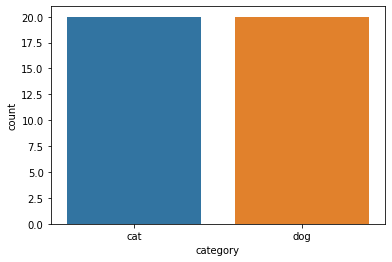

In [14]:
sns.countplot(df['category'])
plt.show()

In [15]:
# list file names from cats and dogs folders in test
fn_test_cats = os.listdir('data/test/cats')
fn_test_dogs = os.listdir('data/test/dogs')

In [16]:
# categorize 0 for cats and 1 for dogs in train
categories = []

for image in fn_test_cats:
    category = image.split('.')[0]
    categories.append('cat')
  
for image in fn_test_dogs:
    category = image.split('.')[0]
    categories.append('dog')
    
df_test = pd.DataFrame({'filename': fn_test_cats+fn_test_dogs,
                  'category': categories})

In [17]:
df_test.head()

,filename,category
0,108.jpg,cat
1,104.jpg,cat
2,102.jpg,cat
3,106.jpg,cat
4,101.jpg,cat


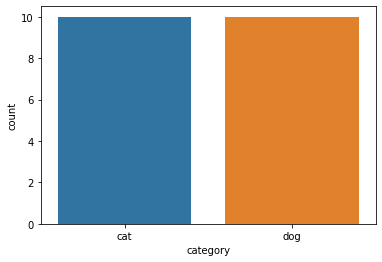

In [18]:
sns.countplot(df_test['category'])
plt.show()

In [19]:
def createCNNModel():
    model = Sequential()
    model.add(Conv2D(name='conv_layer1', filters= 32, kernel_size=5,
                activation='relu', 
                padding='valid',
                input_shape=[256, 256, 3]))
    model.add(BatchNormalization())
    model.add(MaxPool2D(name='max_pool_layer1', pool_size= 2))
    model.add(Conv2D(name='conv_layer2', filters= 64, kernel_size=5,
                activation='relu', 
                padding='valid'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(name='max_pool_layer2', pool_size= 2))
    model.add(Flatten(name='flatten_layer'))
    model.add(Dense(units = 32, name='dense_layer1', activation = 'relu'))
    model.add(Dropout(0.4, name='dropout'))
    model.add(BatchNormalization())
    model.add(Dense(units= 2, name='dense_output', activation= 'softmax'))
    print(model.summary())
    return model

In [20]:
def compileAndTrainModel(model):
    model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
    return model

In [21]:
callback = EarlyStopping(monitor='val_loss', patience=5)

In [22]:
def fitAndEvaluateModel(model, epoch):
    history = model.fit(training_set, 
          validation_data = validation_set, 
          epochs=epoch,
          callbacks=[callback])
    
    result = model.evaluate(validation_set)
    history = pd.DataFrame(history.history)
    return (history, model, result)

In [23]:
head = ['Loss', 'Accuracy']

In [24]:
data = []

In [25]:
history, model1, result = fitAndEvaluateModel(compileAndTrainModel(createCNNModel()), 100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer1 (Conv2D)        (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 max_pool_layer1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv_layer2 (Conv2D)        (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     256       
 hNormalization)                                                 
                                                        

In [26]:
data.append(result)

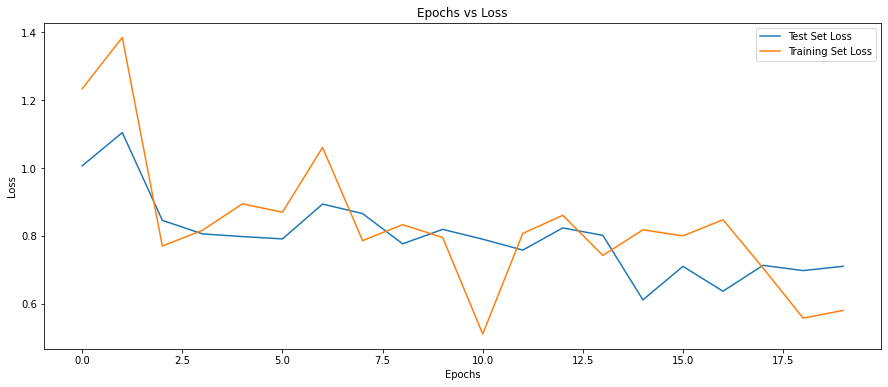

In [27]:
plt.figure(figsize = (15,6))
plt.plot(history.iloc[:, 2], label='Test Set Loss')
plt.plot(history.iloc[:, 0], label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

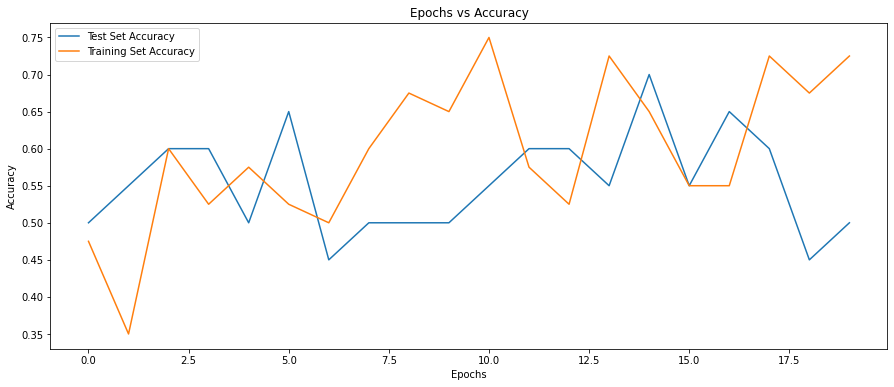

In [28]:
plt.figure(figsize = (15,6))
plt.plot(history.iloc[:, 3], label='Test Set Accuracy')
plt.plot(history.iloc[:, 1], label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
history, model2, result = fitAndEvaluateModel(compileAndTrainModel(createCNNModel()), 200)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer1 (Conv2D)        (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization_3 (Batc  (None, 252, 252, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pool_layer1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv_layer2 (Conv2D)        (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_4 (Batc  (None, 122, 122, 64)     256       
 hNormalization)                                                 
                                                      

In [30]:
data.append(result)

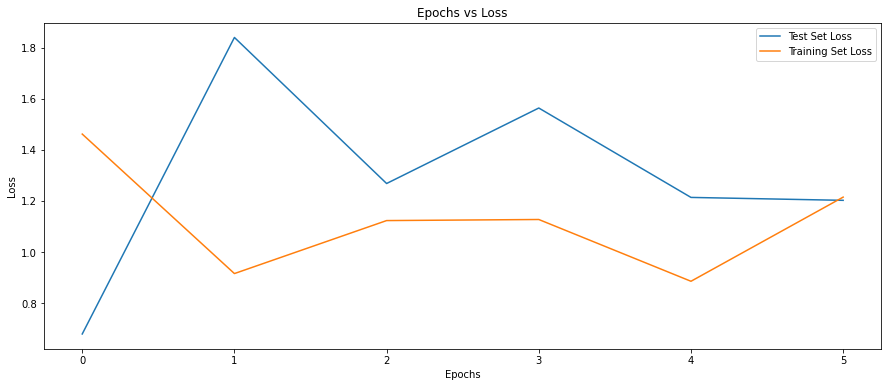

In [31]:
plt.figure(figsize = (15,6))
plt.plot(history.iloc[:, 2], label='Test Set Loss')
plt.plot(history.iloc[:, 0], label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

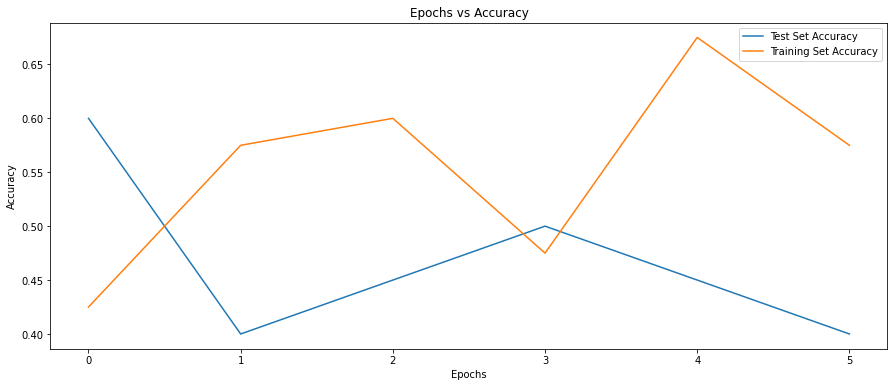

In [32]:
plt.figure(figsize = (15,6))
plt.plot(history.iloc[:, 3], label='Test Set Accuracy')
plt.plot(history.iloc[:, 1], label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
history, model3, result = fitAndEvaluateModel(compileAndTrainModel(createCNNModel()), 300)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer1 (Conv2D)        (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization_6 (Batc  (None, 252, 252, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pool_layer1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv_layer2 (Conv2D)        (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_7 (Batc  (None, 122, 122, 64)     256       
 hNormalization)                                                 
                                                      

In [34]:
data.append(result)

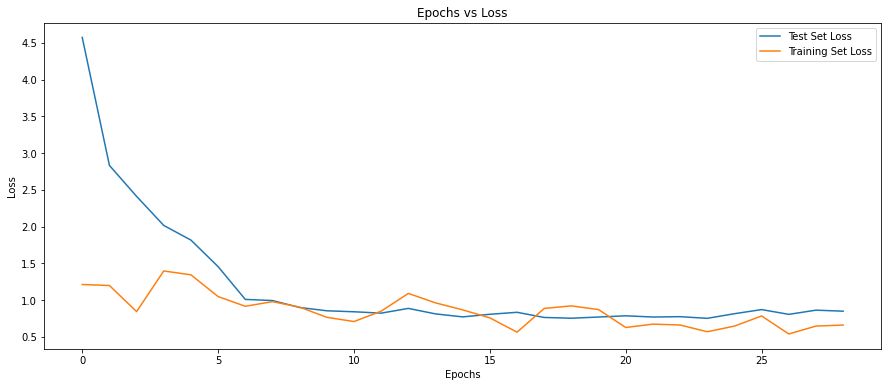

In [35]:
plt.figure(figsize = (15,6))
plt.plot(history.iloc[:, 2], label='Test Set Loss')
plt.plot(history.iloc[:, 0], label='Training Set Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

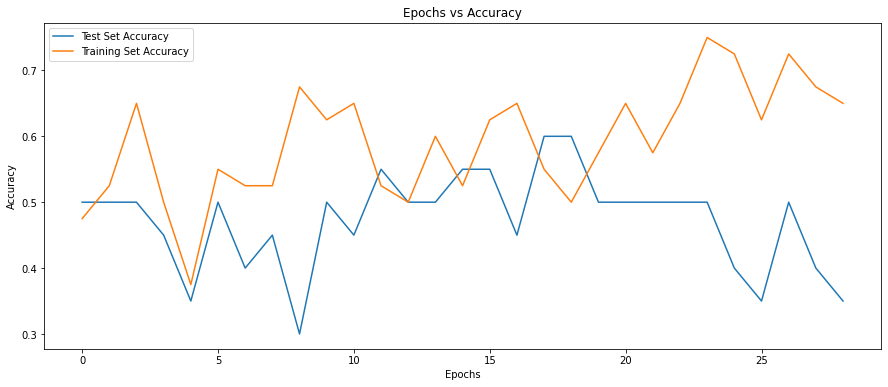

In [36]:
plt.figure(figsize = (15,6))
plt.plot(history.iloc[:, 3], label='Test Set Accuracy')
plt.plot(history.iloc[:, 1], label='Training Set Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
# Report

print(tabulate(data, headers=head, tablefmt="grid"))

+----------+------------+
|     Loss |   Accuracy |
+==========+============+
| 0.696867 |       0.6  |
+----------+------------+
| 1.10612  |       0.45 |
+----------+------------+
| 0.727904 |       0.55 |
+----------+------------+


Model 2 gave poor performance in terms of loss and accuracy. So we can go for model 1.

In [38]:
# Predict the test images with optimal model

pred = model1.predict(validation_set)
df_test['pred_category']  = np.argmax(pred, axis=1)
df_test['pred_category'] = df_test['pred_category'].replace({0:'cat', 1: 'dog'})
df_test.head(10)

,filename,category,pred_category
0,108.jpg,cat,dog
1,104.jpg,cat,dog
2,102.jpg,cat,dog
3,106.jpg,cat,cat
4,101.jpg,cat,dog
5,110.jpg,cat,dog
6,109.jpg,cat,dog
7,105.jpg,cat,cat
8,103.jpg,cat,dog
9,107.jpg,cat,cat
